In [1]:
import pandas as pd

In [14]:
import descartes
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
%matplotlib inline


In [5]:
pop_by_county = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\census data\Iowa population by county from Iowa demographics.csv')

In [18]:
# pop_by_county[['County','Population']]

In [36]:
# s.replace('is','was')
pop_by_county['county2'] = pop_by_county.County.str.replace(' County','')


In [39]:
# pop_by_county.set_index('county2')
pop_by_county.head()

,Rank,County,Population,county2
0,1,Polk County,485418,Polk
1,2,Linn County,225601,Linn
2,3,Scott County,172938,Scott
3,4,Johnson County,150819,Johnson
4,5,Black Hawk County,131813,Black Hawk


In [2]:
sdtypes = {'Store_Number':str,'Zip_Code':str, 'Store_Location':str, 'County_Number':str}

In [3]:
stores = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\stores_2021.csv',index_col=0, dtype=sdtypes)

In [15]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1948 entries, 223124 to 1094183
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Store_Number    1948 non-null   object
 1   Store_Name      1948 non-null   object
 2   Address         1948 non-null   object
 3   City            1948 non-null   object
 4   Zip_Code        1948 non-null   object
 5   Store_Location  1790 non-null   object
 6   County_Number   1948 non-null   object
 7   County          1948 non-null   object
dtypes: object(8)
memory usage: 137.0+ KB


In [20]:
stores.head()

,Store_Number,Store_Name,Address,City,Zip_Code,Store_Location,County_Number,County
223124,3855,Dyno's Wine and Spirits / Storm Lake,1201 1/2 Lakeshore Dr,Storm Lake,50588,NaN,11,BUENA VIST
231153,4589,Dyno's #53 / Sibley,1026 2nd Ave,Sibley,51249,POINT (-95.752119 43.397431),72,OSCEOLA
239961,5688,Dyno's #40 / Spencer,1001 S Grand Ave,Spencer,51301,POINT (-95.143701 43.12759),21,CLAY
246141,4592,Dyno's #29 / Emmetsburg,"2401, Main",Emmetsburg,50536,POINT (-94.681939 43.111913),74,PALO ALTO
262897,5689,Dyno's #41 / Albert City,5101 230th St,Albert City,50510,POINT (-94.953239 42.777449),11,BUENA VIST


In [27]:
stores['county_title'] = stores.County.str.title()

In [29]:
# stores['county_title'] 

In [6]:
# us = gpd.read_file("./data/us-county-boundaries/us-county-boundaries.shp")
us = gpd.read_file(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\us-county-boundaries.shp')

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\geopandas\array.py:85: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


In [12]:
us.head(2)

,statefp,countyfp,countyns,geoid,name,namelsad,stusab,lsad,classfp,mtfcc,...,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,state_name,countyfp_no,geometry
0,39,063,01074044,39063,Hancock,Hancock County,OH,06,H1,G4020,...,22300,None,A,1.376126e+09,6020647.0,+41.0004711,-083.6660335,Ohio,63,"POLYGON ((-83.88076 41.08036, -83.88076 41.081..."
1,51,179,01480173,51179,Stafford,Stafford County,VA,06,H1,G4020,...,47900,47894,A,6.972372e+08,28088011.0,+38.4132608,-077.4513342,Virginia,179,"POLYGON ((-77.58878 38.50404, -77.58295 38.508..."


In [9]:
iowa = us[us.stusab == "IA"]
iowa = iowa.set_index('name')

iowa['area'] = iowa.area
iowa['area'].head()

name
Cedar      0.163206
Howard     0.136193
Warren     0.159731
Madison    0.156604
Shelby     0.165628
Name: area, dtype: float64

In [31]:
iowa.head(3)

,statefp,countyfp,countyns,geoid,namelsad,stusab,lsad,classfp,mtfcc,csafp,...,metdivfp,funcstat,aland,awater,intptlat,intptlon,state_name,countyfp_no,geometry,area
name,,,,,,,,,,,,,,,,,,,,,
Cedar,19,031,00465205,19031,Cedar County,IA,06,H1,G4020,None,...,None,A,1.500799e+09,6385832.0,+41.7723600,-091.1326105,Iowa,31,"POLYGON ((-91.36608 41.86007, -91.36620 41.860...",0.163206
Howard,19,089,00465233,19089,Howard County,IA,06,H1,G4020,None,...,None,A,1.225703e+09,931478.0,+43.3653125,-092.3219084,Iowa,89,"POLYGON ((-92.55374 43.42890, -92.55373 43.429...",0.136193
Warren,19,181,00465279,19181,Warren County,IA,06,H1,G4020,218,...,None,A,1.475873e+09,9097100.0,+41.3324459,-093.5687512,Iowa,181,"POLYGON ((-93.55821 41.51148, -93.55674 41.511...",0.159731


In [33]:
# stores.merge(trans, how='inner', on=['Store_Number'])
pop_by_county[['County','Population']].merge(iowa, how='inner',right_on='County', left_on='namelsad')

KeyError: 'County'

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


<AxesSubplot:>

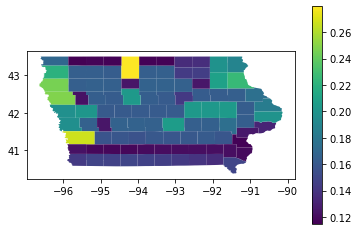

In [7]:
fig.ax

iowa.plot('area', legend = True)